<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Or OLS(ordinary Least squares) : 
it is the process of predicting a continues value. it is a supervised learning which is given a set of inputs with their labels. we are taking advantage of historical data to make prediction.
here the labels are drawn from real numbers, like the amount of Co2 emission from a car, price of a car and so on.
we model this with linear function,and our task is to estimate the slope which is also known is the parameter of the model, so that it best fits the label and the inputs(features).
Loss(guess,actual) = (guess-actual)^2.
we will treat linear regression as an optimization problem, in which given data set D, we wish to find a linear hypothesis that minimizes mean squared error.
the mean squared error is the average of the difference between what our model predicts and what the true label is. 
Basically loss tells us how unhappy we are with the prediction, we want to boost our happiness here

## Importing Libraries: 
in order to do maths operation, we have library like **numpy** to take care of all maths operations, esecially the matrix operation
we also have **pandas** which is like excel to handel dataset operation, there is also **matplotlib** which does plotting operation.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The **wget** command is a command line utility for downloading files from the Internet. It supports downloading multiple files, downloading in the background: "google"
this makes our life easier by downloading data from the internet by the fly and does all the backround works.
we download a data set from IBM, Co2 emission against different featrues of a car

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-05-26 14:03:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2022-05-26 14:03:58 (1.17 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Exploring the Data

A DataFrame is a 2-dimensional data structure that can store data of different types,it is common to use df as shortcut for  DataFrame,

Here is an introductory tutorials from pandas website, you can have a look into it.
https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Finding Relationship among our features 
even though all features are important for us, but we want to look deeper inside the onse who has more effect on Co2 emission.
for that we will look for specific columns and rows

In [ ]:
df.iloc[32:50,3:15]


,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
32,MID-SIZE,3.0,6,AS8,D,10.0,6.4,8.4,34,227
33,FULL-SIZE,3.0,6,AS8,Z,13.1,8.8,11.2,25,258
34,FULL-SIZE,4.0,8,AS8,Z,14.7,9.7,12.5,23,288
35,FULL-SIZE,6.3,12,AS8,Z,18.2,12.6,15.7,18,361
36,FULL-SIZE,3.0,6,AS8,D,10.1,6.5,8.5,33,230
37,STATION WAGON - SMALL,2.0,4,AS8,Z,11.8,8.8,10.5,27,242
38,SUV - SMALL,2.0,4,AS8,Z,12.0,8.5,10.4,27,239
39,SUV - SMALL,3.0,6,AS8,Z,12.9,9.2,11.2,25,258
40,SUV - SMALL,2.0,4,AS8,Z,9.9,8.3,9.2,31,212
41,SUV - SMALL,3.0,6,AS8,D,10.3,7.6,9.1,31,246


from the above table we can see that there is an indirect relationship between Co2 Emission and FUELCONSUMPTION_COMB_MPG. 
we will plot a scatter for this 

In [ ]:
# summarize the data by using the describe method
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Explore some specific features and features

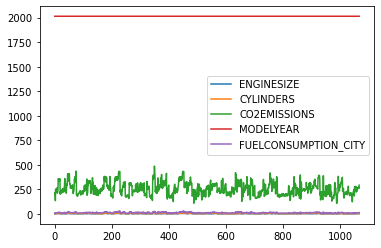

In [ ]:
sdf = df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','MODELYEAR','FUELCONSUMPTION_CITY','MAKE']]
sdf.plot()

### Let us explore about the latest model car and maximum  of Co2 emission which happened in year

In [ ]:
max_Co2 = pd.Series(df['CO2EMISSIONS'])
max_Co2.max()


488

In [ ]:
car_model = pd.Series(df['MODELYEAR'])
car_model.max()

2014

## Lets Explore the data by visualizing them

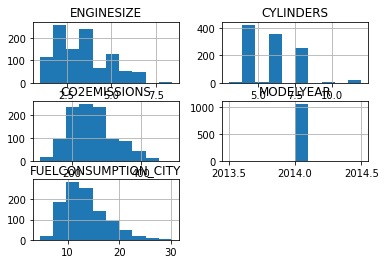

In [ ]:
visual = sdf 
visual.hist()
plt.show()

In [ ]:
# we will look into the relationship between Co2Emission and Cylinders, because later, we will use scatter plot for them 
CYL_Co2 = df[['CYLINDERS',"CO2EMISSIONS"]]
CYL_Co2

,CYLINDERS,CO2EMISSIONS
0,4,196
1,4,221
2,4,136
3,6,255
4,6,244
...,...,...
1062,6,271
1063,6,264
1064,6,271
1065,6,260


In [ ]:
CYL_Co2 = df[['CYLI',"CO2EMISSIONS"]]
CYL_Co2

##  Scatter plot
Definition: Scatter plots are the graphs that present the relationship between two variables in a data-set.(src:'Google')

Text(0, 0.5, 'Co2Emission')

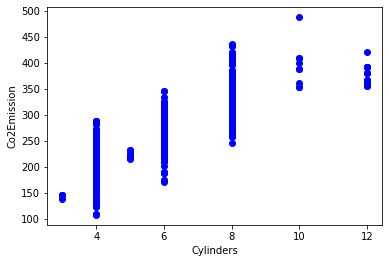

In [ ]:
plt.scatter(df.CYLINDERS,sdf.CO2EMISSIONS,color='blue')
plt.xlabel('Cylinders')
plt.ylabel("Co2Emission")

Text(0, 0.5, 'FUELCONSUMPTION_COMB_MPG')

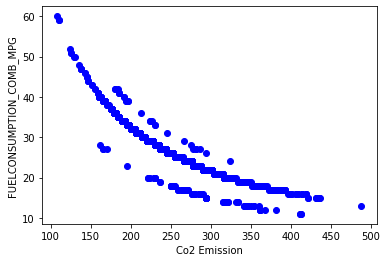

In [ ]:
plt.scatter(sdf.CO2EMISSIONS,df.FUELCONSUMPTION_COMB_MPG,color='blue')
plt.xlabel('Co2 Emission')
plt.ylabel("FUELCONSUMPTION_COMB_MPG")

Text(0, 0.5, 'FUELCONSUMPTION_COMB')

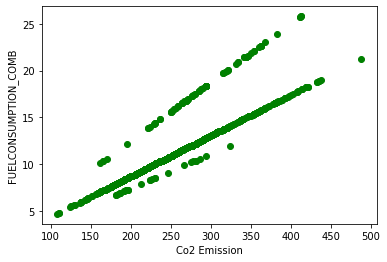

In [ ]:
plt.scatter(sdf.CO2EMISSIONS,df.FUELCONSUMPTION_COMB,color='green')
plt.xlabel('Co2 Emission')
plt.ylabel("FUELCONSUMPTION_COMB")

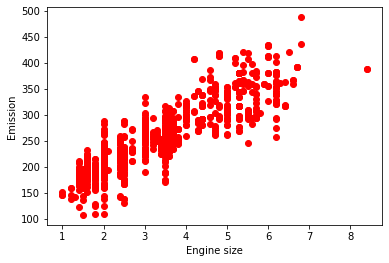

In [ ]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### from above plots even though we can observe relationship among our features, bue we have to pick the one which have strong effect on Co2 Emission , alteast for now to explore more

### Creating data sets
Normally we divide our data sets into two parts, one we use for training our model, the other one to test.
by training data the model will be provided with the features and their labels so that the model learn the parameteres like coefficients and intercept point as it is a simple linea regression.
by test data set, we will examine our model how well it does to unseen data.
generally we divide datasets in ration 80:20 which 20% for testing and 80% for training.

np.random.rand(x) returns x random numbers with uniforms distribution over 0 to 1 (exclusive). When we apply the condition < 0.8 it returns True for every number which is less than 0.8 This will make sure that approximately 80 percent of values are True and rest are False. So, in essence you can have a 80/20 train test split when you apply this mask to your original df. df[mask] will return every index for which the msk value is True. And ~mask means "not equal to" in df indexing.(src:'reddit')

In [67]:
mask = np.random.rand(len(df))<0.8
train = df[mask]
test = df[~mask]

From the above plotting we will choose ENGINESIZE vs O2EMISSION because it looks more like a linear plot. by plotting using train datasets,we can observe the relationship almost the same because we pick the data sets randomly.

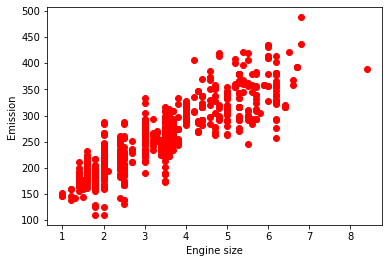

In [68]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Modeling
we can use from the sklearn libraries to train our model.
**what is a Model ?** a model is a a maping function which maps the input to output, it has the hypotheses classes it will pick the one with minimum error.
our model have learnabel parameters which learn during the training process, which in return by using those parameters it maps the inputs to outputs.
by fitting our model our task is to find coefficient and intercept which causes the minimum erroe , remember we had **Y = mx+c** , where m is the coefficient and c is the interception or coefficient. by using this formulla we will fit our straight line.

In [112]:
from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(train_x,train_y)
print('interception=',model.intercept_)
print('Coefficient=',model.coef_)

interception= [125.19720925]
Coefficient= [[39.10277262]]


#### Now we will plot our model,and the straight line, ***y=mx+c***

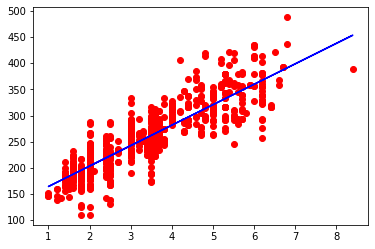

In [125]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")
plt.plot(train_x,model.coef_[0][0]*train_x+model.intercept_[0],color = "b")
# plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'red')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")

# Evaluation
we measure the accuracy of our model by comparing the difference between the predicted value which has been done by our model and the true label or output which is there in the data. if the difference is high, we say our model is not accurate and how much ever the difference is less, that much the model is close to the true labels. **L(guess,actual) = (predicted-ture_output)^2** this is also known as loss of our model.
Lower loss makes us happier


# Losses
There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). src: "IBM Course, introduction to machine learning"


In [127]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.22
Residual sum of squares (MSE): 955.92
R2-score: 0.79


In [136]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = model.predict(test_x)
MAE = np.mean(np.absolute(test_y_-test_y))
RMS = np.mean((test_y_-test_y)**2)
R_2 = r2_score(test_y , test_y_)
print("MAE",MAE)
print("RMSE",RMS)
print("R_2",R_2)

MAE 23.219011711921
RMSE 955.9223518376259
R_2 0.7856193228003042


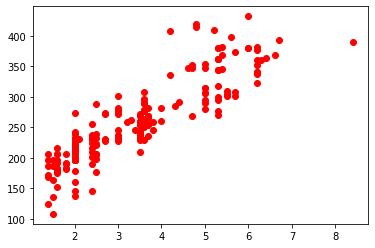

In [146]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color="red")


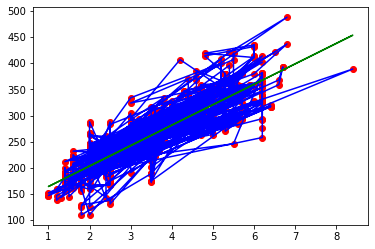

In [145]:
plt.plot(train_x,train_y,color = "b")
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")
plt.plot(train_x,model.coef_[0][0]*train_x+model.intercept_[0],color = "green")